In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
dataset=pd.read_csv('dataset1.csv')

In [2]:
dataset.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
drop_columns=['CustomerID', 'Churn Label','Churn Reason','Churn Score','CLTV','Lat Long', 'Count','Country','State']
dataset=dataset.drop(columns=drop_columns)
dataset['Zip Code']=dataset['Zip Code'].astype(str)
dataset['Total Charges'] = pd.to_numeric(dataset['Total Charges'], errors='coerce')
###THIS SECTION IS DATASET SPECIFIC PROCESSING


In [4]:
dataset.describe(include='all')

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
count,7043,7043,7043.000000,7043.000000,7043,7043,7043,7043,7043.000000,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043.000000
unique,1129,1652,NaN,NaN,2,2,2,2,NaN,2,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,Los Angeles,90003,NaN,NaN,Male,No,No,No,NaN,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,305,5,NaN,NaN,3555,5901,3641,5416,NaN,6361,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,NaN
mean,NaN,NaN,36.282441,-119.798880,NaN,NaN,NaN,NaN,32.371149,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,0.265370
std,NaN,NaN,2.455723,2.157889,NaN,NaN,NaN,NaN,24.559481,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,0.441561
min,NaN,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000
25%,NaN,NaN,34.030915,-121.815412,NaN,NaN,NaN,NaN,9.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,0.000000
50%,NaN,NaN,36.391777,-119.730885,NaN,NaN,NaN,NaN,29.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,0.000000
75%,NaN,NaN,38.224869,-118.043237,NaN,NaN,NaN,NaN,55.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,1.000000


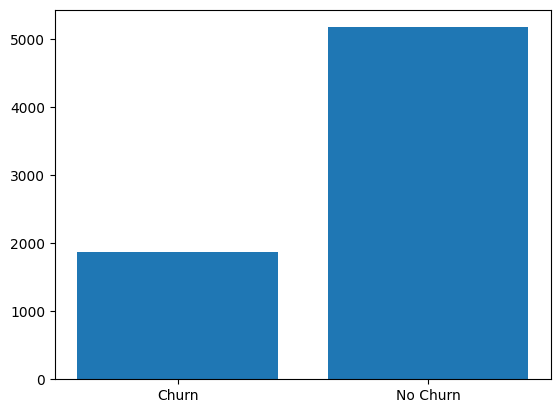

In [5]:
from pre_processor import PreProcessor


label_column = 'Churn Value'
pre_processor = PreProcessor(dataset)
pre_processor.rename_label(label_column).split_features_labels().plot_imbalance()
   

In [6]:
pre_processor.dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   object 
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

In [7]:
pre_processor.dataset.describe(include='all')

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,churn
count,7043,7043,7043.000000,7043.000000,7043,7043,7043,7043,7043.000000,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043.000000
unique,1129,1652,NaN,NaN,2,2,2,2,NaN,2,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,Los Angeles,90003,NaN,NaN,Male,No,No,No,NaN,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,305,5,NaN,NaN,3555,5901,3641,5416,NaN,6361,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,NaN
mean,NaN,NaN,36.282441,-119.798880,NaN,NaN,NaN,NaN,32.371149,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,0.265370
std,NaN,NaN,2.455723,2.157889,NaN,NaN,NaN,NaN,24.559481,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,0.441561
min,NaN,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000
25%,NaN,NaN,34.030915,-121.815412,NaN,NaN,NaN,NaN,9.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,0.000000
50%,NaN,NaN,36.391777,-119.730885,NaN,NaN,NaN,NaN,29.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,0.000000
75%,NaN,NaN,38.224869,-118.043237,NaN,NaN,NaN,NaN,55.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,1.000000


In [8]:
binary_encode_columns=['City','Zip Code']
one_hot_encode_columns=['Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method']
ordinal_encode_columns=[]
scaling_columns=[column for column in dataset.columns if column not in binary_encode_columns+one_hot_encode_columns+ordinal_encode_columns+[label_column]]


In [9]:
scaling_columns

['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges']

In [10]:

pre_processor.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()
    

In [11]:
pre_processor.dataset

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,...,Contract_3,Paperless Billing_1,Paperless Billing_2,Payment Method_1,Payment Method_2,Payment Method_3,Payment Method_4,Monthly Charges,Total Charges,churn
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,-0.363923,-0.959649,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.196178,-0.940457,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1.158489,-0.645369,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1.329677,0.336516,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1.293113,1.214589,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0,0,0,0,0,0,1,1,1,1,...,0,1,0,0,1,0,0,0.731349,-0.733673,1.0
10322,0,1,1,0,0,1,1,1,1,1,...,0,1,0,1,0,0,0,-0.975547,-0.960223,1.0
10323,0,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0.191192,-0.976238,1.0
10324,0,0,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.942426,-0.023052,1.0


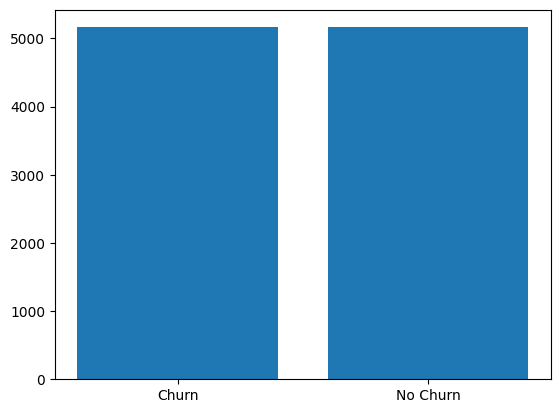

In [12]:
pre_processor.plot_imbalance()

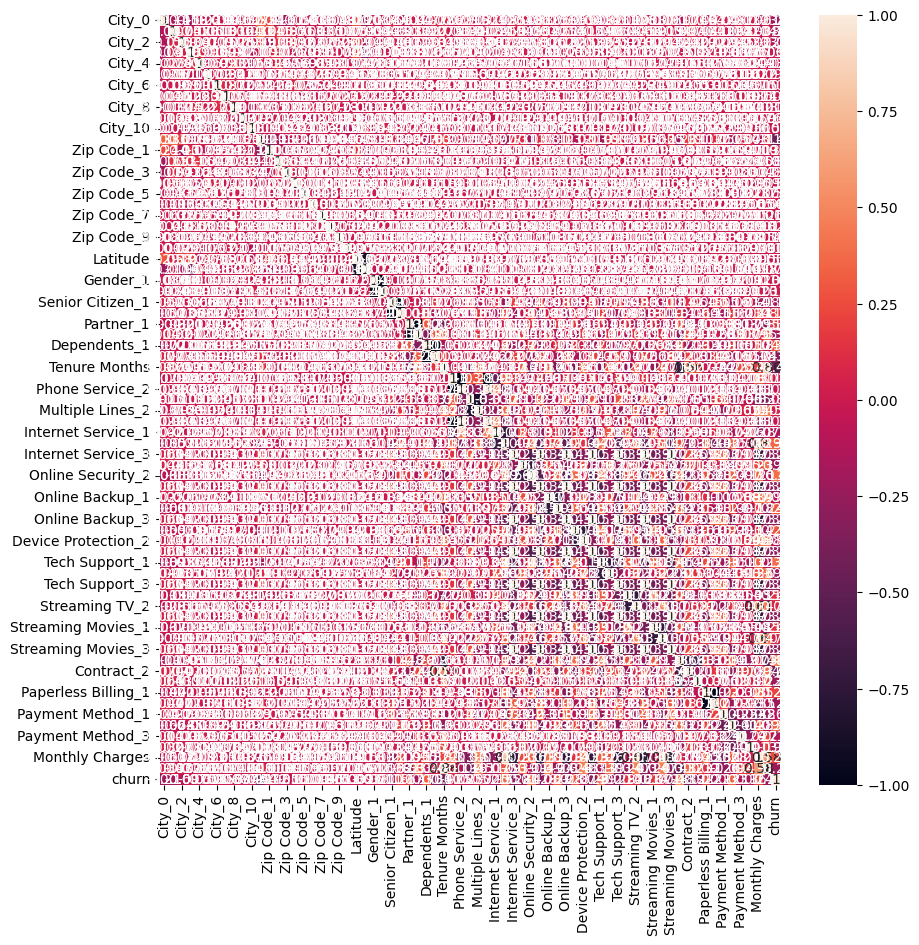

In [13]:
pre_processor.plot_correlation()

In [14]:
pre_processor.calculate_feature_importance()

,importance
Zip Code_0,0.094412
Total Charges,0.069946
Tenure Months,0.068729
Contract_1,0.061533
Monthly Charges,0.052555
...,...
Online Backup_3,0.002199
Phone Service_2,0.002120
Multiple Lines_3,0.002066
Tech Support_3,0.001978


In [15]:
pre_processor.remove_features_by_importance(0.00)

In [16]:
pre_processor.split_features_labels()

In [17]:
pre_processor.calculate_feature_importance()

,importance
Zip Code_0,0.090480
Tenure Months,0.082195
Contract_1,0.064084
Total Charges,0.062585
Monthly Charges,0.051925
...,...
Online Backup_3,0.003340
Online Security_3,0.003313
Phone Service_2,0.002077
Phone Service_1,0.002038


In [18]:
X_train,X_test,y_train,y_test = pre_processor.train_test_split()

In [19]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=5)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)


In [20]:
pre_processor.dataset

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,...,Contract_3,Paperless Billing_1,Paperless Billing_2,Payment Method_1,Payment Method_2,Payment Method_3,Payment Method_4,Monthly Charges,Total Charges,churn
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,-0.363923,-0.959649,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.196178,-0.940457,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1.158489,-0.645369,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1.329677,0.336516,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1.293113,1.214589,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0,0,0,0,0,0,1,1,1,1,...,0,1,0,0,1,0,0,0.731349,-0.733673,1.0
10322,0,1,1,0,0,1,1,1,1,1,...,0,1,0,1,0,0,0,-0.975547,-0.960223,1.0
10323,0,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0.191192,-0.976238,1.0
10324,0,0,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.942426,-0.023052,1.0


In [21]:
from train_setup import Model_selection

model_select=Model_selection()

model_select.train(X_train,y_train,X_test,y_test,n_trials_=2)

[I 2024-06-11 11:18:03,147] A new study created in memory with name: no-name-ec89763f-bed4-4717-aaa8-ed35accc2325
[I 2024-06-11 11:18:03,788] Trial 0 finished with value: 0.836319612590799 and parameters: {'n_estimators': 25, 'max_depth': 16, 'min_samples_split': 18, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.836319612590799.
[I 2024-06-11 11:18:07,087] Trial 1 finished with value: 0.8523002421307506 and parameters: {'n_estimators': 123, 'max_depth': 22, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.8523002421307506.
[I 2024-06-11 11:18:07,087] A new study created in memory with name: no-name-b08892ba-b983-42dc-a854-655d4de195dd
[I 2024-06-11 11:18:11,245] Trial 0 finished with value: 0.8320823244552059 and parameters: {'num_layers': 1, 'layer1_size': 38, 'layer2_size': 33, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.056388029258025524}. Best is trial 0 with value: 0.8320823244552059.
[I 2024-06-11 11:18:16,593] Trial 1 finished with 

In [22]:
model_select.classification_reports()

Random Forest
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1037
         1.0       0.86      0.90      0.88      1029

    accuracy                           0.88      2066
   macro avg       0.88      0.88      0.88      2066
weighted avg       0.88      0.88      0.88      2066

Neural Network
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1037
         1.0       0.85      0.86      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      1037
         1.0       0.90      0.96      0.93      1029

    accuracy                           0.93      2066
   macro avg       0.93      0.93      0.93      2066
weighted avg       0.93    

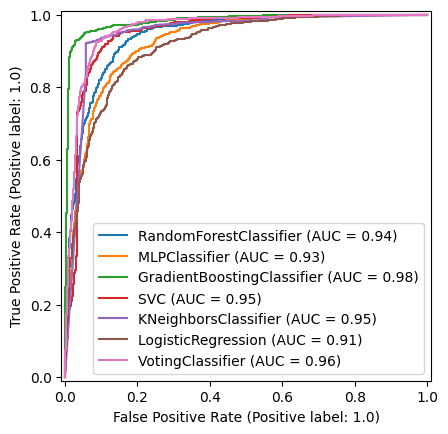

In [23]:
model_select.roc_curve()

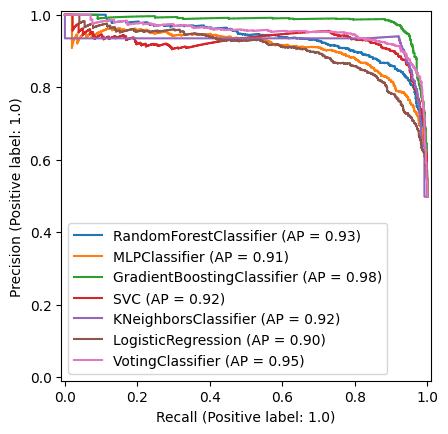

In [24]:
model_select.precision_recall_curve()